<a href="https://colab.research.google.com/github/Tactical-Play/Unsupervised-ML-Session/blob/main/Unsupervised_ML_Workshop_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning

**Datasets used:**
 Mall Customers Dataset



The dataset contains information for 200 mall customers, collected through  
membership cards. The columns are:
* CustomerID: A unique identifier for each customer.
* Gender: The customer's gender (Male/Female).
* Age: The customer's age in years.
* Annual Income (k$): The customer's annual income in thousands of dollars.
* Spending Score (1-100): A score assigned by the mall based on customer behavior and purchasing data, intended to indicate spending propensity

The original dataset has been modified to demonstrate some data pre-processing techniques.




# Importing the required tools/libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [2]:
!pip install -q kmedoids

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.3/476.3 kB 17.3 MB/s eta 0:00:00


In [3]:
!pip install -q scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 47.3 MB/s eta 0:00:00


In [4]:
from sklearn.metrics.pairwise import euclidean_distances
import kmedoids

## 1. Dataset Loading – Mall Customers

In the subsequent cell, try changing the value of url to

url = "https://raw.githubusercontent.com/Tactical-Play/Unsupervised-ML-Session/refs/heads/main/Mall_Customers.csv" which is the original dataset, without missing values.

In [5]:
url = "https://raw.githubusercontent.com/Tactical-Play/Unsupervised-ML-Session/refs/heads/main/Mall_Customers_mod.csv" #modified to contain missing values for demonstration
df_mall = pd.read_csv(url)
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


## 2. Dataset Characteristics

In [6]:
df_mall.info(), df_mall.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


(None,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          180.000000              200.000000
 mean   100.500000   38.850000           60.155556               50.200000
 std     57.879185   13.969007           26.614740               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           40.000000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           77.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000)

## 3. Pre-processing

### a) Handling Missing Values – Mean Imputation

Missing values are basically empty entries in the data table.
In our dataset, some values are missing. We replace the missing values with the average (mean) of the non-missing values in the same column

In [7]:
df_temp = df_mall.copy()

print("No. of missing values before preprocessing\n")
print(df_temp.isnull().sum())
imputer = SimpleImputer(strategy='mean')
df_temp[['Annual Income (k$)']] = imputer.fit_transform(
    df_temp[['Annual Income (k$)']]
)

print("\nafter preprocessing\n")
print(df_temp.isnull().sum())


No. of missing values before preprocessing

CustomerID                 0
Gender                     0
Age                        0
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

after preprocessing

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### b) Converting Categorical → Numerical

In [8]:
encoder = LabelEncoder()
df_temp['Gender'] = encoder.fit_transform(df_temp['Gender'])

df_temp.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


### c) Outlier Handling (Z-score Method)

In [9]:
from scipy.stats import zscore

numeric_cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
z_scores = np.abs(zscore(df_temp[numeric_cols]))
df_clean = df_temp[(z_scores < 3).all(axis=1)]

df_clean.shape


(198, 5)

### d) Normalization

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[numeric_cols])


## 4. Clustering Algorithms

Note:
We use 5 clusters to align with commonly used Mall Customer segmentation examples.
The choice of k is typically guided by the elbow method, silhouette score, and business interpretability.


### a) K-Means Clustering

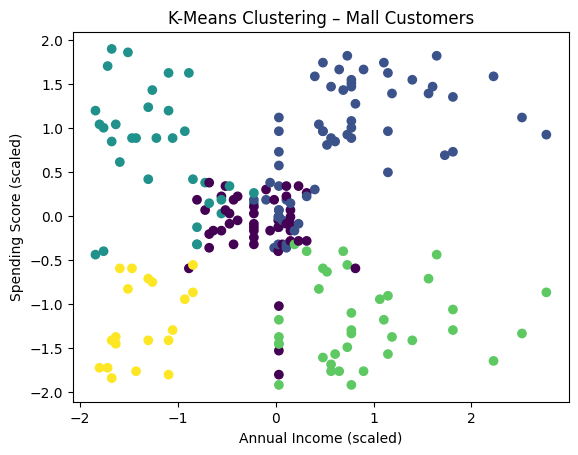

Silhouette Score: 0.3617619633534193


In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:,1], X_scaled[:,2], c=labels_kmeans)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clustering – Mall Customers")
plt.show()

print("Silhouette Score:", silhouette_score(X_scaled, labels_kmeans))


### b) K-Medoids (PAM)

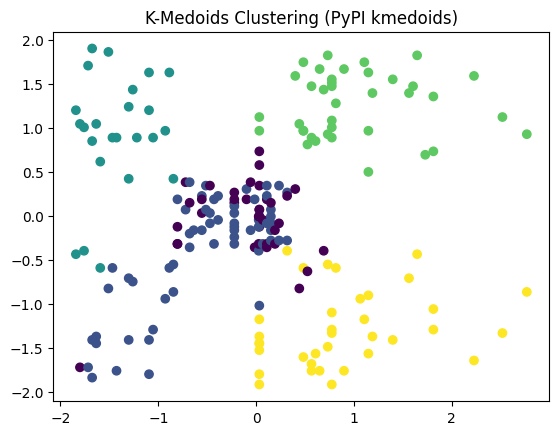

In [12]:
D = euclidean_distances(X_scaled)
kmed = kmedoids.KMedoids(
    n_clusters=5,
    method="fasterpam",
    metric="precomputed",
    random_state=42
)

result = kmed.fit(D)
labels_kmedoids = result.labels_
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels_kmedoids)
plt.title("K-Medoids Clustering (PyPI kmedoids)")
plt.show()

### c) Fuzzy C-Means

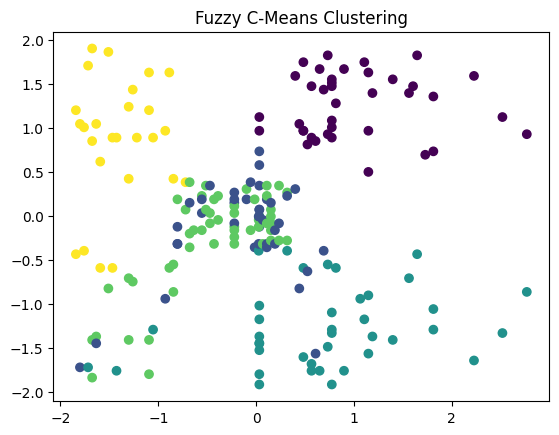

In [13]:
import skfuzzy as fuzz

cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    X_scaled.T, c=5, m=2, error=0.005, maxiter=1000
)

labels_fuzzy = np.argmax(u, axis=0)

plt.scatter(X_scaled[:,1], X_scaled[:,2], c=labels_fuzzy)
plt.title("Fuzzy C-Means Clustering")
plt.show()


### d) DBSCAN

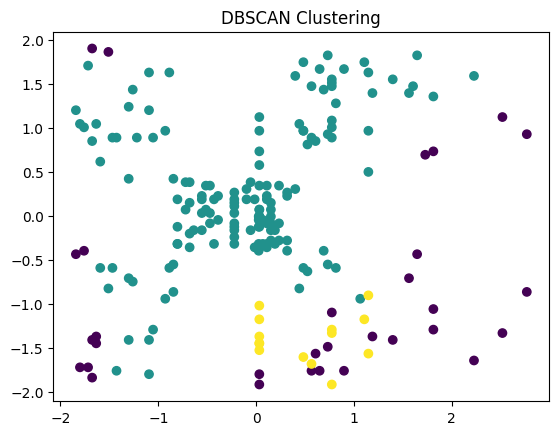

In [14]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,1], X_scaled[:,2], c=labels_dbscan)
plt.title("DBSCAN Clustering")
plt.show()


Different plots using the three features: Age, Annual Income and Spending Score

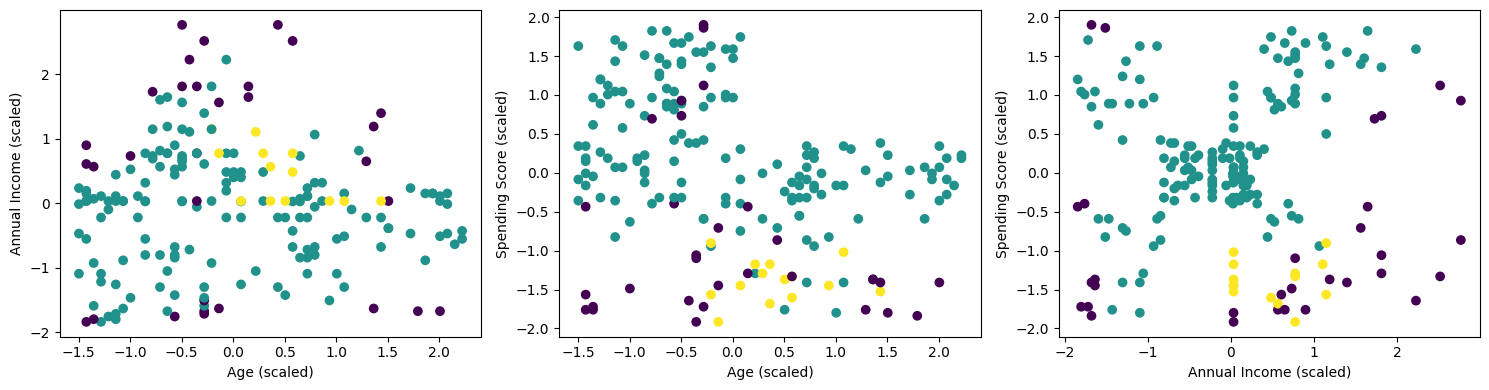

In [15]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_dbscan)
plt.xlabel("Age (scaled)")
plt.ylabel("Annual Income (scaled)")

plt.subplot(1,3,2)
plt.scatter(X_scaled[:,0], X_scaled[:,2], c=labels_dbscan)
plt.xlabel("Age (scaled)")
plt.ylabel("Spending Score (scaled)")

plt.subplot(1,3,3)
plt.scatter(X_scaled[:,1], X_scaled[:,2], c=labels_dbscan)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")

plt.tight_layout()
plt.show()


Observe how DBSCAN behaves under different values of eps and min_samples

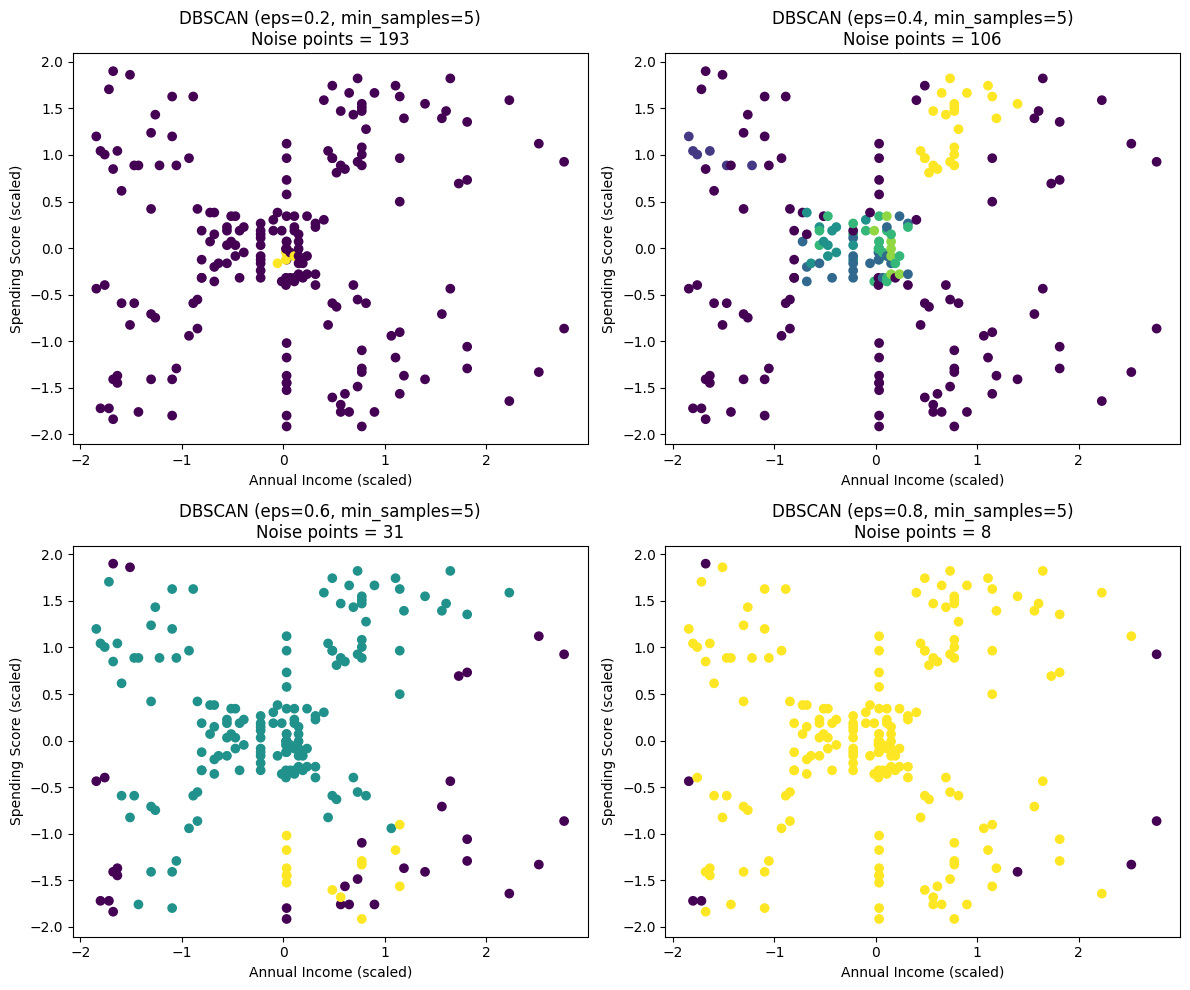

In [16]:
eps_values = [0.2, 0.4, 0.6, 0.8]

plt.figure(figsize=(12, 10))

for i, eps in enumerate(eps_values, 1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)

    n_noise = list(labels).count(-1)
    plt.subplot(2, 2, i)
    plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels)
    plt.title(f"DBSCAN (eps={eps}, min_samples=5)\nNoise points = {n_noise}")
    plt.xlabel("Annual Income (scaled)")
    plt.ylabel("Spending Score (scaled)")

plt.tight_layout()
plt.show()


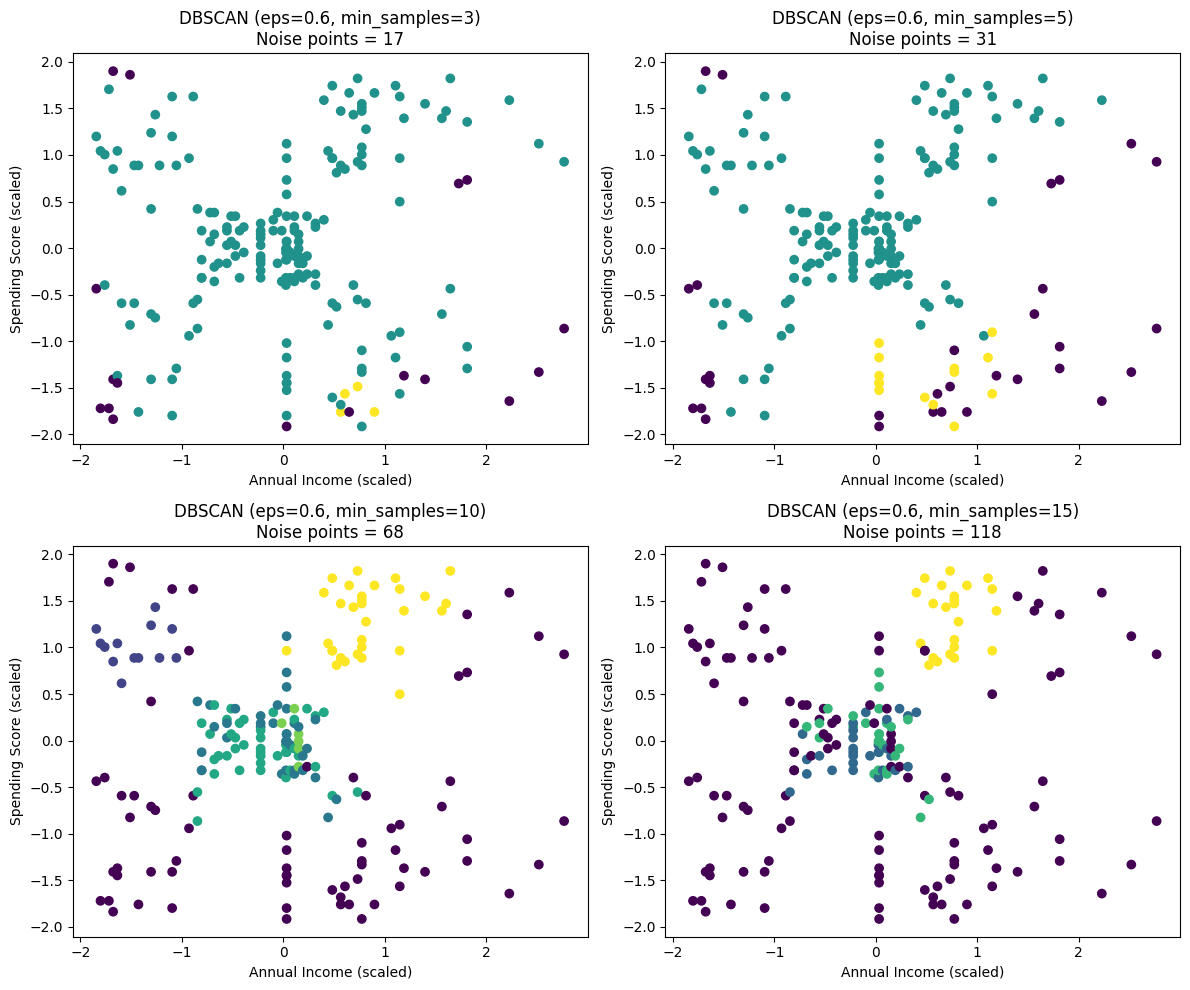

In [17]:
min_samples_values = [3, 5, 10, 15]

plt.figure(figsize=(12, 10))

for i, min_s in enumerate(min_samples_values, 1):
    dbscan = DBSCAN(eps=0.6, min_samples=min_s)
    labels = dbscan.fit_predict(X_scaled)

    n_noise = list(labels).count(-1)
    plt.subplot(2, 2, i)
    plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels)
    plt.title(f"DBSCAN (eps=0.6, min_samples={min_s})\nNoise points = {n_noise}")
    #plt.title(f"DBSCAN (eps=0.6, min_samples={min_s})")
    plt.xlabel("Annual Income (scaled)")
    plt.ylabel("Spending Score (scaled)")

plt.tight_layout()
plt.show()


### Algorithm Suitability (Mall Customers)

- K-Means: Best overall for this dataset due to compact, spherical clusters
- K-Medoids: More robust but similar behavior to K-Means
- Fuzzy C-Means: Captures overlapping customer behavior well
- DBSCAN: Less suitable due to lack of strong density-separated clusters


There is no universally best clustering algorithm.
The effectiveness of an algorithm depends on data geometry, noise, and the analysis objective.


#Use-Cases
Customer Segmentation: Group customers based on their income and spending
habits.

Behavioral Analysis: Explore how factors like gender, age, and income influence spending scores.

Clustering: Apply algorithms such as K-means to identify clusters of customers with similar characteristics.

Targeted Marketing Campaigns: Use the insights to create personalized promotions for different customer segments.